In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image, title, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.show()
    
def save_image(image, filename):
    cv2.imwrite(filename, image)

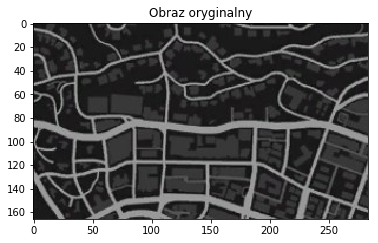

In [2]:
image = load_image('data/gtav2.jpg')
show_image(image, 'Obraz oryginalny')

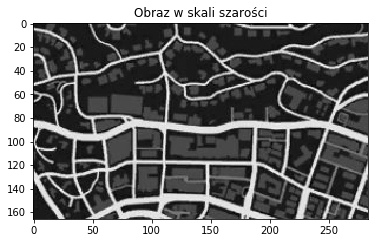

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(image_gray, 'Obraz w skali szarości', cmap='gray')

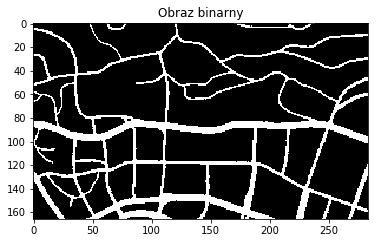

In [4]:
_, image_binary = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
show_image(image_binary, 'Obraz binarny', cmap='gray')

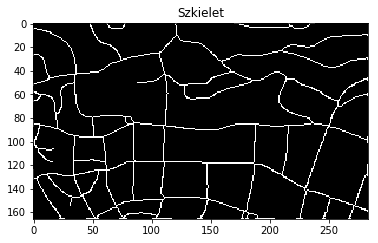

In [5]:
sk = cv2.ximgproc.thinning(image_binary, thinningType = cv2.ximgproc.THINNING_ZHANGSUEN)
show_image(sk, "Szkielet", cmap='gray')

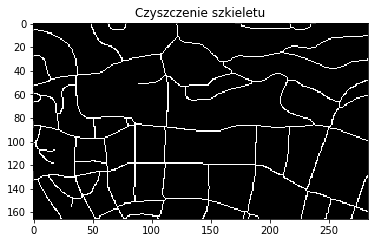

In [7]:
kernel = np.ones((2,2),np.uint8)
dilated = cv2.dilate(sk, kernel)
eroded = cv2.erode(dilated, kernel)
sk2 = cv2.ximgproc.thinning(eroded, thinningType = cv2.ximgproc.THINNING_ZHANGSUEN)
show_image(sk2, "Czyszczenie szkieletu", cmap='gray')

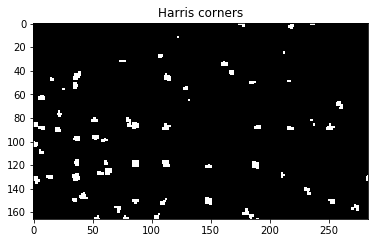

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


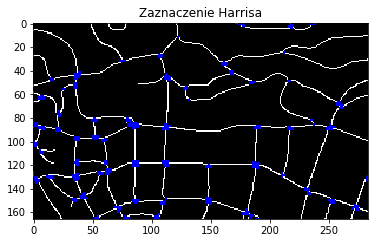

In [9]:
img = np.float32(cv2.bitwise_not(sk2))
crn = cv2.cornerHarris(img, 3, 3, 0.03)
crn = np.abs(crn)
_, crn = cv2.threshold(crn, crn.max()*0.3, 255, cv2.THRESH_BINARY)
crn = cv2.dilate(crn, kernel)
crn = np.uint8(crn)
show_image(crn, 'Harris corners', cmap='gray')
save_image(crn, "gtav_corners.png")

new_img = np.zeros((img.shape[0], img.shape[1], 3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = [sk2[i][j], sk2[i][j], sk2[i][j]]
        if crn[i][j] > 150:
            new_img[i][j] = [0, 0, 255]

show_image(new_img, 'Zaznaczenie Harrisa')
save_image(new_img, "gtav_corners2.png")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


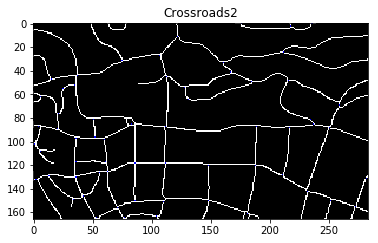

[(77, 164), (53, 164), (104, 163), (181, 161), (71, 156), (273, 155), (252, 150), (86, 150), (110, 151), (34, 149), (148, 150), (42, 146), (232, 142), (2, 132), (282, 131), (13, 129), (36, 130), (211, 128), (56, 126), (63, 125), (148, 120), (188, 120), (112, 118), (86, 118), (61, 117), (36, 117), (6, 108), (1, 102), (60, 98), (36, 97), (52, 96), (20, 89), (217, 88), (189, 87), (251, 88), (237, 85), (112, 87), (4, 87), (235, 81), (83, 85), (51, 81), (21, 76), (259, 69), (131, 64), (6, 62), (25, 55), (128, 54), (35, 52), (185, 49), (216, 48), (15, 47), (113, 45), (37, 44), (167, 41), (161, 33), (75, 31), (107, 27), (212, 24), (122, 11), (218, 2), (236, 0), (176, 0)]


In [11]:
crossroads = []

#copy binary image to color
new_img = np.zeros((img.shape[0], img.shape[1], 3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = [sk2[i][j], sk2[i][j], sk2[i][j]]
        
# blobs mass center points
_, contours, _ = cv2.findContours(crn,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
   # calculate moments for each contour
    M = cv2.moments(c)
 
   # calculate x,y coordinate of center
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        crossroads.append((cX, cY))
        new_img[cY][cX] = [0, 0, 255]
show_image(new_img, 'Crossroads2')
save_image(new_img, "gtav_corners3.png")
print(crossroads)